# Conclusion - Un Apport journalier équilibré

Le nutriscore peut permettre d’améliorer la santé des français. En effet, il permet de catégoriser les aliments selon l’influence des facteurs suivants : matières grasses, additifs, fibres, protéines, glucides, sels. 
Il faut aussi ajouter des poids métiers afin de noter les aliments positivement ou négativement selon ces facteurs.

Cependant, c’est la combinaison de ces aliments qui va permettre aux français de manger équilibrer et de recevoir un apport nutritionnel quotidien suffisant.

Ainsi, il est nécessaire de proposer une application – Smart-food et de modifier les « étiquettes » du nutriscore afin de catégoriser les aliments et que ce soit plus parlant pour la population.


# Pour aller plus loin : Knn classifier

Remplaçons les données manquantes du nutrition grade fr. Utilisons le Knn classifier qui permet de prédire les données selon les plus proche voisins.

Utilisons les variables regroupées que nous avons utilisé pour la CAH.

In [1]:
data_knn = data[['reg_salt', 'nutrition_grade_fr', 'reg_additives', 'reg_fat',
       'reg_carbohydrates', 'reg_fiber', 'reg_protein']]

NameError: name 'data' is not defined

In [241]:
data_knn = data_knn.loc[(pd.isna(data_knn["reg_salt"])==False) & (pd.isna(data_knn["reg_additives"])==False) 
                        & (pd.isna(data_knn["reg_fat"])==False) & (pd.isna(data_knn["reg_carbohydrates"])==False) 
                        & (pd.isna(data_knn["reg_fiber"])==False) & (pd.isna(data_knn["reg_protein"])==False)]

In [248]:
data_knn_train = data_knn.loc[pd.isna(data_knn["nutrition_grade_fr"])==False]

In [249]:
data_knn_train.shape

(64838, 7)

In [273]:
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Nutgrade_encoded=le.fit_transform(data_knn_train["nutrition_grade_fr"])
print(Nutgrade_encoded)

[0 1 4 ... 2 2 1]


In [274]:
features=list(zip(data_knn_train["reg_salt"], data_knn_train["reg_additives"], data_knn_train["reg_fat"]
                 , data_knn_train["reg_carbohydrates"], data_knn_train["reg_fiber"], data_knn_train["reg_protein"]))


In [275]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, Nutgrade_encoded, test_size=0.3) # 70% training and 30% test


In [276]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [277]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6461546370553156


Taux de classification à 64,6%

#### Appliquons ce modèle sur les données à prédire

In [250]:
data_knn_test = data_knn.loc[pd.isna(data_knn["nutrition_grade_fr"])==True]

In [251]:
data_knn_test.shape

(578, 7)

In [252]:
data_knn_test.columns

Index(['reg_salt', 'nutrition_grade_fr', 'reg_additives', 'reg_fat',
       'reg_carbohydrates', 'reg_fiber', 'reg_protein'],
      dtype='object')

Commençons par encoder le nutrion grade fr

In [263]:
features_test=list(zip(data_knn_test["reg_salt"], data_knn_test["reg_additives"], data_knn_test["reg_fat"]
                 , data_knn_test["reg_carbohydrates"], data_knn_test["reg_fiber"], data_knn_test["reg_protein"]))

Construisons le modèle de classificateur KNN.

In [261]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [262]:
# Train the model using the training sets
model.fit(features,Nutgrade_encoded)

KNeighborsClassifier()

In [265]:
predicted= model.predict(features_test) # 0:Overcast, 2:Mild

In [268]:
data_knn_test=data_knn_test.assign(nutrition_grade_fr=predicted)

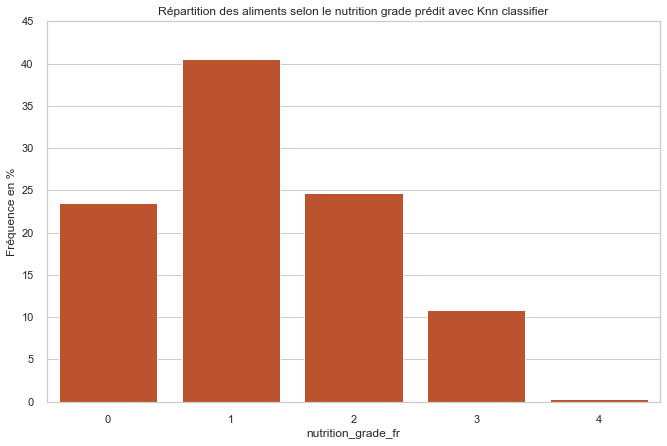

In [278]:
pk.graph_barplot(data_knn_test['nutrition_grade_fr'], "Répartition des aliments selon le nutrition grade prédit avec Knn classifier", 
              (0.82, 0.28, 0.09),
              0, 45, "nutrition_grade_fr", "Fréquence en %",0,1, (11,7))